### 데이터 세트 종류 확인

In [2]:
import re, json
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
PATH = 'C:/Users/msi/Desktop/공부/자연어처리/Kaggle/Day3/AirBNB/dataset/'

In [4]:
AGE_GENDER = 'age_gender_bkts.csv'
COUNTRIY = 'countries.csv'
SESSIONS = 'sessions.csv'

TRAIN_USERS = 'train_users_2.csv'
TEST_USERS = 'test_users.csv'

SAMPLE = 'sample_submission_NDF.csv'

In [10]:
age_df = pd.read_csv(PATH + AGE_GENDER)
country_df = pd.read_csv(PATH + COUNTRIY)
session_df = pd.read_csv(PATH + SESSIONS)

train_df = pd.read_csv(PATH + TRAIN_USERS)
test_df = pd.read_csv(PATH + TEST_USERS)

sample_df = pd.read_csv(PATH + SAMPLE)

#### [1-1] 구조 확인 (속성)

In [11]:
age_df.head(5)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [12]:
country_df.head(5)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [13]:
session_df.head(5)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [14]:
train_df.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [15]:
test_df.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


* train_data 속성

**id** : 유저 id <br>
**date_account_created** : 계정 생성 날짜<br>
**timestamp_first_active** :  처음 활동한 날짜  (이 feature는 계정 생성 or  첫 예약 날짜보다 이전일 것입니다)<br>
**date_first_booking** : 첫 예약한 날짜<br>
**gender** : 성별<br>
**age** : 나이<br>
**signup_method** : 회원가입 방법<br>
**signup_flow** : 회원가입할 때 사용자가 보고있는 page 번호<br>
**language** : 선호 언어, 사용 언어(모국어)<br>
**affiliate_channel** : Airbnb 유입경로<br>
**affiliate_provider** : 유입 장소 (google, craigslist, other)<br>
**first_affiliate_tracked** : 회원가입 전 user가 반응한 첫번째 marketing<br>
**signup_app** : Web , iOS, Android etc<br>
**first_device_type** : Window/Mac desktop , iPhone etc<br>
**first_browser** : Chrome, Safari, Firefox etc<br>
**country_destination** : 첫 예약 국가 / 우리가 예측해야하는 target 변수<br>

## 데이터 분석

#### [1] 데이터 개수 확인

In [16]:
print(len(train_df))
print(len(test_df))

213451
62096


#### [2] 정답 데이터 : country_destination 확인

In [17]:
print("정답(country_destination)의 속성 값 종류 : ", train_df.country_destination.unique())

정답(country_destination)의 속성 값 종류 :  ['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']


* 정답 중 NAN값은 지워야 한다

In [18]:
train_df = train_df[~train_df['country_destination'].isnull()]

정답(country_destination)의 속성 값 종류 :  ['NDF' 'US' 'other' 'FR' 'CA' 'GB' 'ES' 'IT' 'PT' 'NL' 'DE' 'AU']


In [20]:
print("정답(country_destination)의 nan 제거 결과 : ", len(train_df[train_df['country_destination'].isnull()]))

정답(country_destination)의 nan 제거 결과 :  0


/home/ai-sjjy/anaconda3/envs/juyoung/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


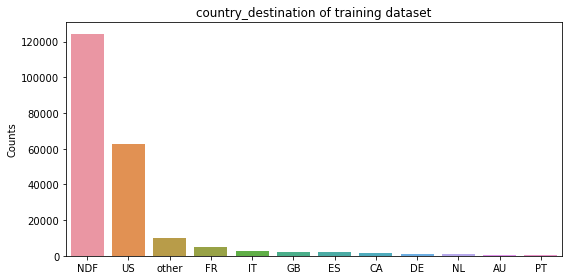

In [13]:
feat_train = train_df['country_destination'].value_counts()
fig = plt.figure(figsize=(8,4))
sns.barplot(feat_train.index.values, feat_train.values)
plt.title('country_destination of training dataset')
plt.ylabel('Counts')
plt.tight_layout()

* 결과 : NDF가 굉장히 많은 값을 차지하고 있다

#### [3] 먼저 어떤 속성에 결측치가 존재하는지 확인

In [21]:
train_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [22]:
test_df.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

* 그 결과 : date_first_booking, age, first_affiliate_tracked에 결측지 존재한다는 것을 알았다

    => 이 값을 어떻게 처리할 지 분석을 통해 진행해야 한다

### [1] AGE

#### [1-2] age에 대한 값 조정

* airBNB는 신규 사용자가 첫 여행 경험을 어디서(목적지)로 예약할 것인지 예측하는 문제이다
* 그렇기 때문에 사실 상 나이가 18 미만, 100 초과인 사람은 본인이 예약한 것이 아니기 때문에 중요치 않다
* 그래서 (18 ~ 100)사이 나이를 가지지 않은 사람을 **nan**으로 업데이트 해준다.
* 그리고 지금 추천을 해주는 것이기 때문에 사람과 관련된 속성을 함부로 제거하면 안된다

In [23]:
train_df.loc[~train_df['age'].between(18, 100), 'age'] = np.nan
test_df.loc[~test_df['age'].between(18, 100), 'age'] = np.nan

In [24]:
print("train age : ", train_df['age'].isnull().sum()) # 87990 -> 90493
print("train age : ", test_df['age'].isnull().sum()) # 28876 -> 29251

train age :  90493
train age :  29251


##### [1-1] 데이터 시각화 1 (age에 따른 사람 수 check)

In [25]:
age_groups_train = [
    train_df[train_df.age.isnull()],
    train_df.query('age >= 18 & age < 25'),
    train_df.query('age >= 25 & age < 35'),
    train_df.query('age >= 35 & age < 45'),
    train_df.query('age >= 45 & age < 55'),
    train_df.query("age >= 55 & age < 65"),
    train_df.query("age >= 65 & age < 75"),
    train_df.query("age >= 75 & age < 85"),
    train_df.query('age >= 85')
]

age_groups_test = [
    test_df[test_df.age.isnull()],
    test_df.query('age >= 18 & age < 25'),
    test_df.query('age >= 25 & age < 35'),
    test_df.query('age >= 35 & age < 45'),
    test_df.query('age >= 45 & age < 55'),
    test_df.query("age >= 55 & age < 65"),
    test_df.query("age >= 65 & age < 75"),
    test_df.query("age >= 75 & age < 85"),
    test_df.query('age >= 85')
]

c:\users\msi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\msi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'counts')

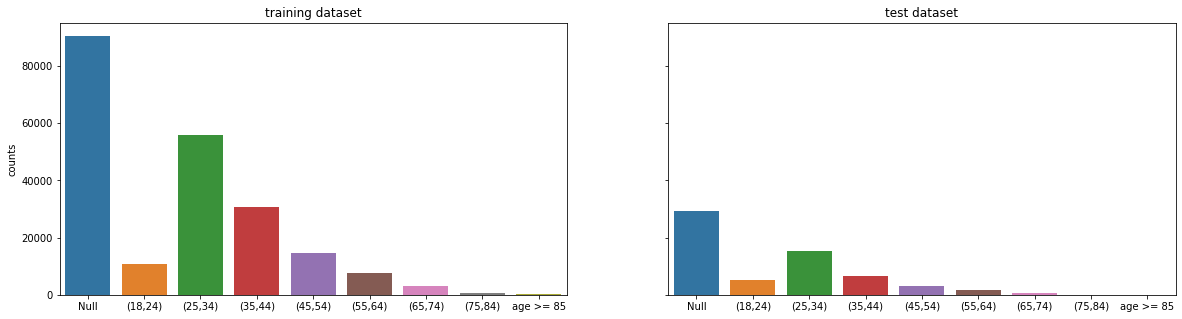

In [26]:
age_train = [age_group.age.shape[0] for age_group in age_groups_train]

age_test = [age_group.age.shape[0] for age_group in age_groups_test]

columns = ['Null', '(18,24)','(25,34)','(35,44)','(45,54)','(55,64)','(65,74)','(75,84)', 'age >= 85']

# plot
fig, (ax1,ax2) = plt.subplots(1,2,sharex=True, sharey = True,figsize=(20,5))

sns.barplot(columns, age_train, ax = ax1)
sns.barplot(columns, age_test, ax = ax2)

ax1.set_title('training dataset')
ax2.set_title('test dataset')
ax1.set_ylabel('counts')

* null이 너무 많음 -> 이 값을 제거하면 안된다

##### [1-2] age와 country destination간의 관계

c:\users\msi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\msi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\msi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will r

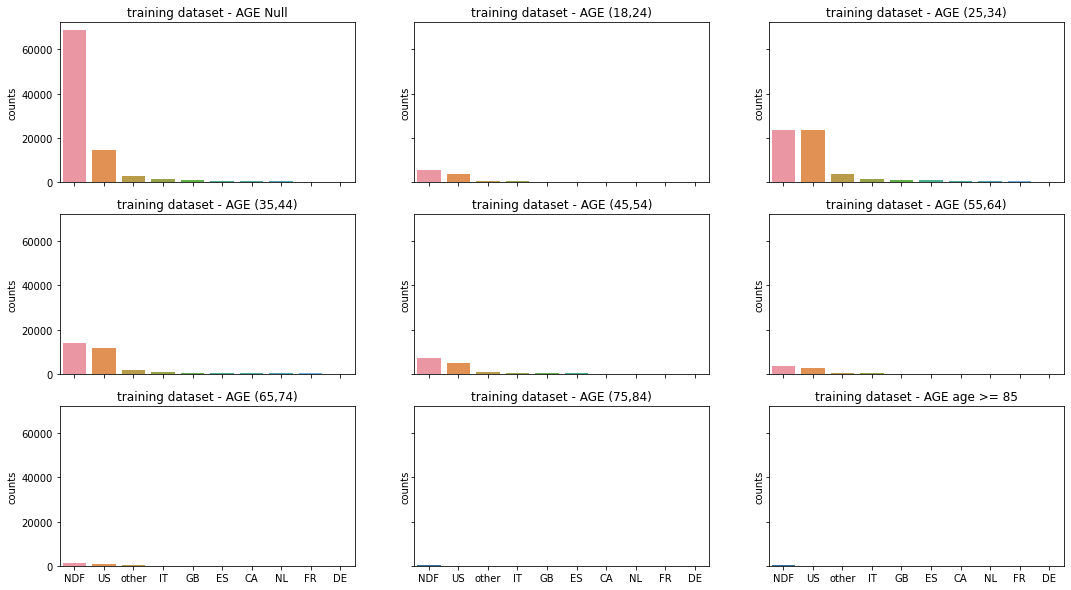

In [27]:
# subplot을 이용해 시각화 진행
age_train = [age_group['country_destination'].value_counts() for age_group in age_groups_train]

columns = ['Null', '(18,24)','(25,34)','(35,44)','(45,54)','(55,64)','(65,74)','(75,84)', 'age >= 85']

fig, axes = plt.subplots(3,3, sharex=True, sharey = True,figsize=(18,10))

for idx, age_group in enumerate(age_train):
    x, y = idx//3, idx%3
    sns.barplot(age_group.index.values, age_group.values, ax = axes[x, y]) # 가로 : 목적지\
    axes[x, y].set_title('training dataset - AGE '+columns[idx])
    axes[x, y].set_ylabel('counts')

* 25 ~ 34 나이 : 가장 많이 여행 다님 + [NDF -> US -> Other]
* 35 ~ 44 : 두 번째로 가장 많이 여행 다님 + [NDF -> US -> Other]

* 대부분 연령대가 [NDF -> US -> Other] 순으로 많이 여행 감

=> 이를 통해 나이가 여행지를 선택할 때 영향을 준다는 것을 알 수 있다.

### [3] GENDER 수정

In [28]:
print("train gender의 속성 값 종류 : ", train_df.gender.unique())
print("test gender의 속성 값 종류 : ", test_df.gender.unique())

train gender의 속성 값 종류 :  ['-unknown-' 'MALE' 'FEMALE' 'OTHER']
test gender의 속성 값 종류 :  ['FEMALE' '-unknown-' 'MALE' 'OTHER']


##### [3-1] Gender 시각화를 통해 비율을 알아보자

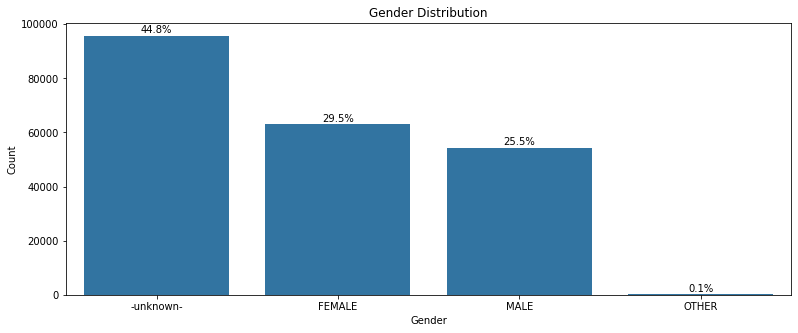

In [31]:
plt.figure(figsize=(13,5))
gender_feature = train_df['gender'].value_counts().index
sns.countplot(data = train_df, x = 'gender', order = gender_feature, color = sns.color_palette()[0])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
gender_feature2 = train_df['gender'].value_counts()

for i in range(gender_feature2.shape[0]):
    count = gender_feature2[i]
    strt='{:0.1f}%'.format(100*count / train_df.shape[0])
    plt.text(i,count+1000,strt,ha='center')

* -unkown-이 차지하는 값이 굉장히 크다 => 함부로 삭제 x 

(array([0, 1, 2, 3]),
 [Text(0, 0, '-unknown-'),
  Text(1, 0, 'MALE'),
  Text(2, 0, 'FEMALE'),
  Text(3, 0, 'OTHER')])

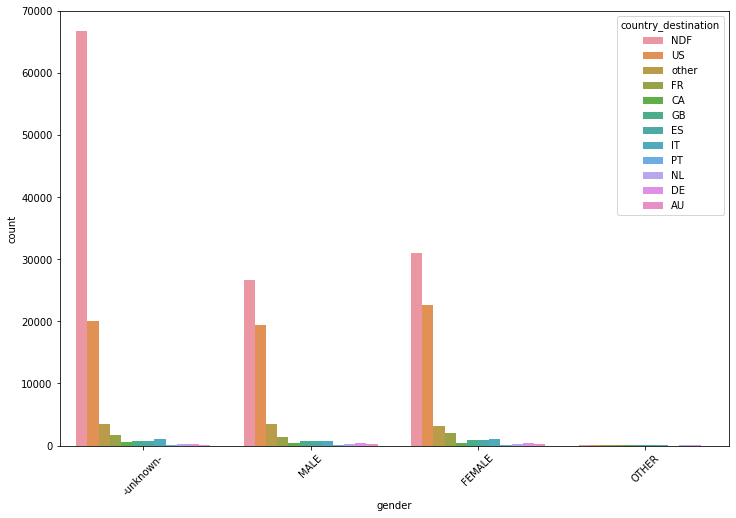

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(x=train_df['gender'], hue='country_destination',
              data=train_df)
plt.xticks(rotation=45)

* 여자가 더 많이 여행 다님 + [NDF -> US -> Other]
* 남자도 여행 많이 다님 + [NDF -> US -> Other]
* other 데이터는 거의 없는 수준이라 빼는 거 고려!

### [4] date_account_created, timestamp_first_active, date_first_booking 날짜 형식으로 변경

* date_account_created : 처음 회원가입한 날짜
* timestamp_first_active : 처음 활동한 날짜  (이 feature는 계정 생성 or  첫 예약 날짜보다 이전일 이어야 한다)
* date_first_booking : 처음 비행기 예약한 날짜

In [21]:
train_df["date_account_created"] = pd.to_datetime(train_df.date_account_created)
train_df["date_account_created"].head()

0          NaT
1   2011-05-25
2   2010-09-28
3   2011-12-05
4          NaT
Name: date_account_created, dtype: datetime64[ns]

In [22]:
test_df["date_account_created"] = pd.to_datetime(test_df.date_account_created)
test_df["date_account_created"].head()

0   2014-07-01
1          NaT
2          NaT
3          NaT
4          NaT
Name: date_account_created, dtype: datetime64[ns]

In [23]:
train_df["timestamp_first_active"] = pd.to_datetime(train_df.timestamp_first_active, format="%Y%m%d%H%M%S")
train_df["timestamp_first_active"].head()

0                   NaT
1   2009-05-23 17:48:09
2   2009-06-09 23:12:47
3   2009-10-31 06:01:29
4                   NaT
Name: timestamp_first_active, dtype: datetime64[ns]

In [24]:
test_df["timestamp_first_active"] = pd.to_datetime(test_df.timestamp_first_active, format="%Y%m%d%H%M%S")
test_df["timestamp_first_active"].head()

0   2014-07-01 00:00:06
1                   NaT
2                   NaT
3                   NaT
4                   NaT
Name: timestamp_first_active, dtype: datetime64[ns]

In [25]:
train_df["date_first_booking"] = pd.to_datetime(train_df.date_first_booking)
train_df["date_first_booking"].head()

0          NaT
1          NaT
2   2010-08-02
3   2012-09-08
4          NaT
Name: date_first_booking, dtype: datetime64[ns]

In [26]:
test_df["date_first_booking"] = pd.to_datetime(test_df.date_first_booking)
test_df["date_first_booking"].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: date_first_booking, dtype: datetime64[ns]

#### [4-1] booked를 찾아라!

In [33]:
train_df.loc[train_df['date_first_booking'].notnull(), 'booked'] = True
train_df.loc[train_df['date_first_booking'].isnull(), 'booked'] = False

In [34]:
test_df.loc[test_df['date_first_booking'].notnull(), 'booked'] = True
test_df.loc[test_df['date_first_booking'].isnull(), 'booked'] = False

In [35]:
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,booked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,820tgsjxq7,2011-05-25,2.009052e+13,NaN,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,False
2,4ft3gnwmtx,2010-09-28,2.009061e+13,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US,True
3,bjjt8pjhuk,2011-12-05,2.009103e+13,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,True
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


/home/ai-sjjy/anaconda3/envs/juyoung/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ai-sjjy/anaconda3/envs/juyoung/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ai-sjjy/anaconda3/envs/juyoung/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an e

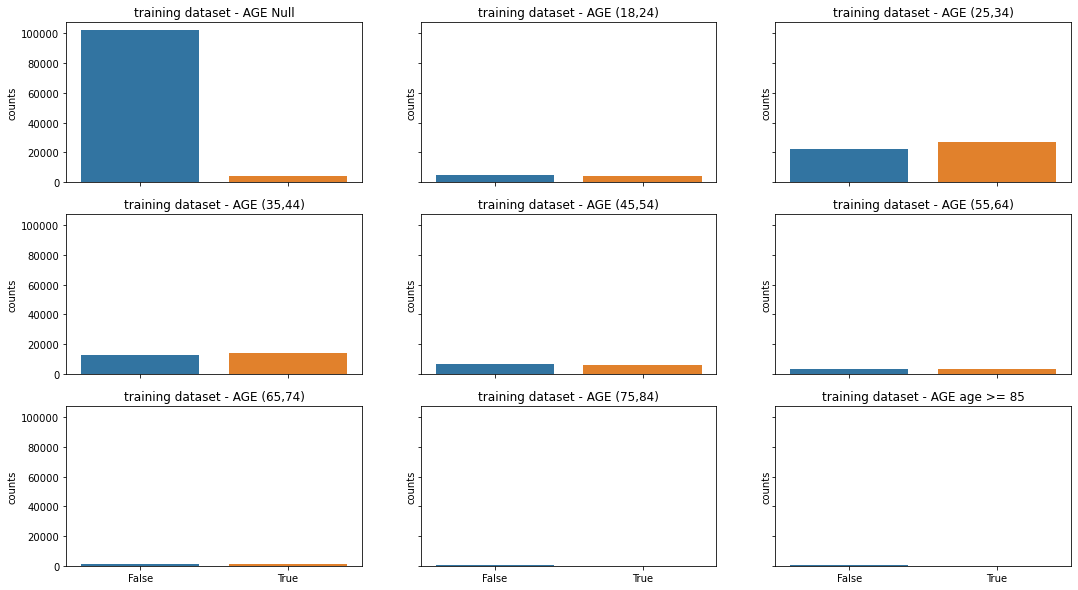

In [38]:
# subplot을 이용해 시각화 진행
age_train = [age_group['booked'].value_counts() for age_group in age_groups_train]

columns = ['Null', '(18,24)','(25,34)','(35,44)','(45,54)','(55,64)','(65,74)','(75,84)', 'age >= 85']

fig, axes = plt.subplots(3,3, sharex=True, sharey = True,figsize=(18,10))

for idx, age_group in enumerate(age_train):
    x, y = idx//3, idx%3
    sns.barplot(age_group.index.values, age_group.values, ax = axes[x, y]) # 가로 : 목적지\
    axes[x, y].set_title('training dataset - AGE '+columns[idx])
    axes[x, y].set_ylabel('counts')

#### [4-2] 처음으로 간 여행지

/home/ai-sjjy/anaconda3/envs/juyoung/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


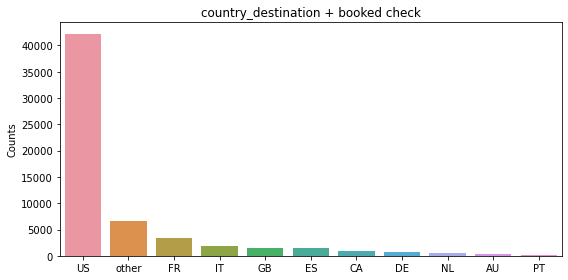

In [39]:
feat_train = train_df[train_df['booked']==True]['country_destination'].value_counts()
fig = plt.figure(figsize=(8,4))
sns.barplot(feat_train.index.values, feat_train.values)
plt.title('country_destination + booked check')
plt.ylabel('Counts')
plt.tight_layout()

* booked(예약)한 것만 출력하면 보시다시피 위에서 NDF값 안나옴
=> 이 값에 해당되는 데이터들로 예측 할 예정

### [5] Language

In [42]:
train_df.language.unique()

array([nan, 'en', 'de', 'fr', 'es', 'pt', 'zh', 'ko', 'ja', 'it', 'ru',
       'nl', 'sv', 'pl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'el', 'th',
       'cs', 'hr', 'ca', 'is'], dtype=object)

In [43]:
train_df.language.value_counts()

en    113359
zh       860
fr       802
es       630
ko       395
de       390
it       365
ru       275
pt       173
ja       132
sv        80
nl        48
tr        42
pl        41
da        35
no        21
el        21
cs        20
id        18
th        18
hu        17
fi        11
is         4
ca         4
hr         2
Name: language, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'en'),
  Text(1, 0, 'de'),
  Text(2, 0, 'fr'),
  Text(3, 0, 'es'),
  Text(4, 0, 'pt'),
  Text(5, 0, 'zh'),
  Text(6, 0, 'ko'),
  Text(7, 0, 'ja'),
  Text(8, 0, 'it'),
  Text(9, 0, 'ru'),
  Text(10, 0, 'nl'),
  Text(11, 0, 'sv'),
  Text(12, 0, 'pl'),
  Text(13, 0, 'hu'),
  Text(14, 0, 'da'),
  Text(15, 0, 'id'),
  Text(16, 0, 'fi'),
  Text(17, 0, 'no'),
  Text(18, 0, 'tr'),
  Text(19, 0, 'el'),
  Text(20, 0, 'th'),
  Text(21, 0, 'cs'),
  Text(22, 0, 'hr'),
  Text(23, 0, 'ca'),
  Text(24, 0, 'is')])

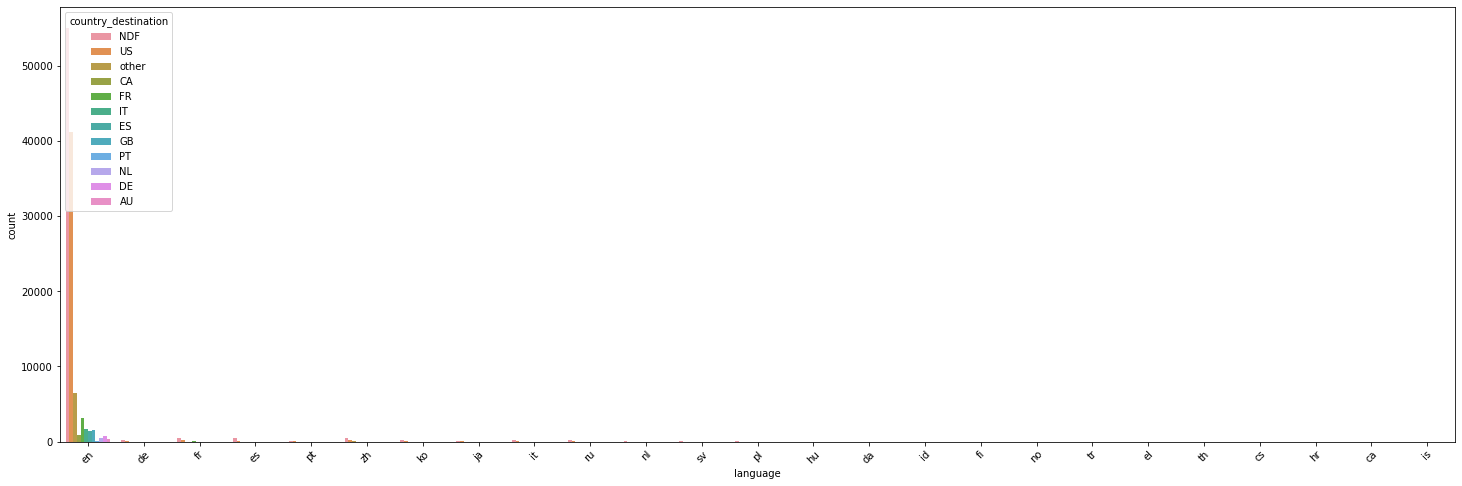

In [47]:
plt.figure(figsize=(25, 8))
sns.countplot(x=train_df['language'], hue='country_destination',
              data=train_df)
plt.xticks(rotation=45)

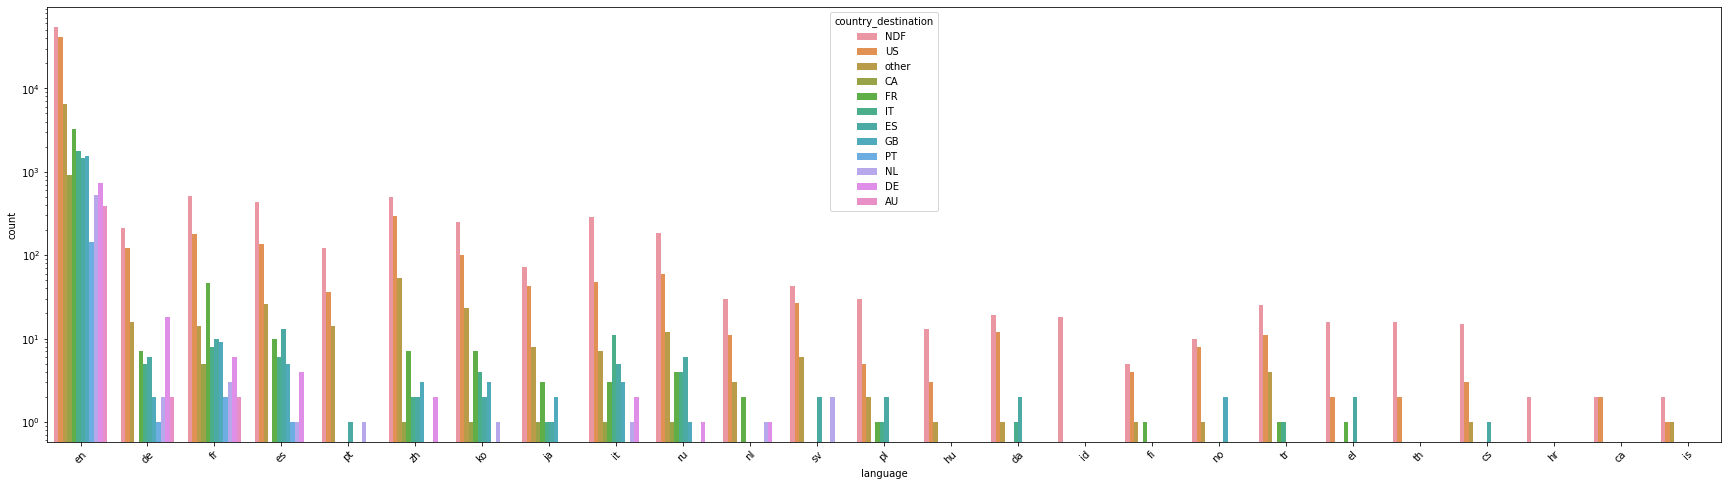

In [50]:
plt.figure(figsize=(30, 8))
sns.countplot(x=train_df['language'], hue='country_destination',
              data=train_df)
plt.xticks(rotation=45)
plt.yscale("log")

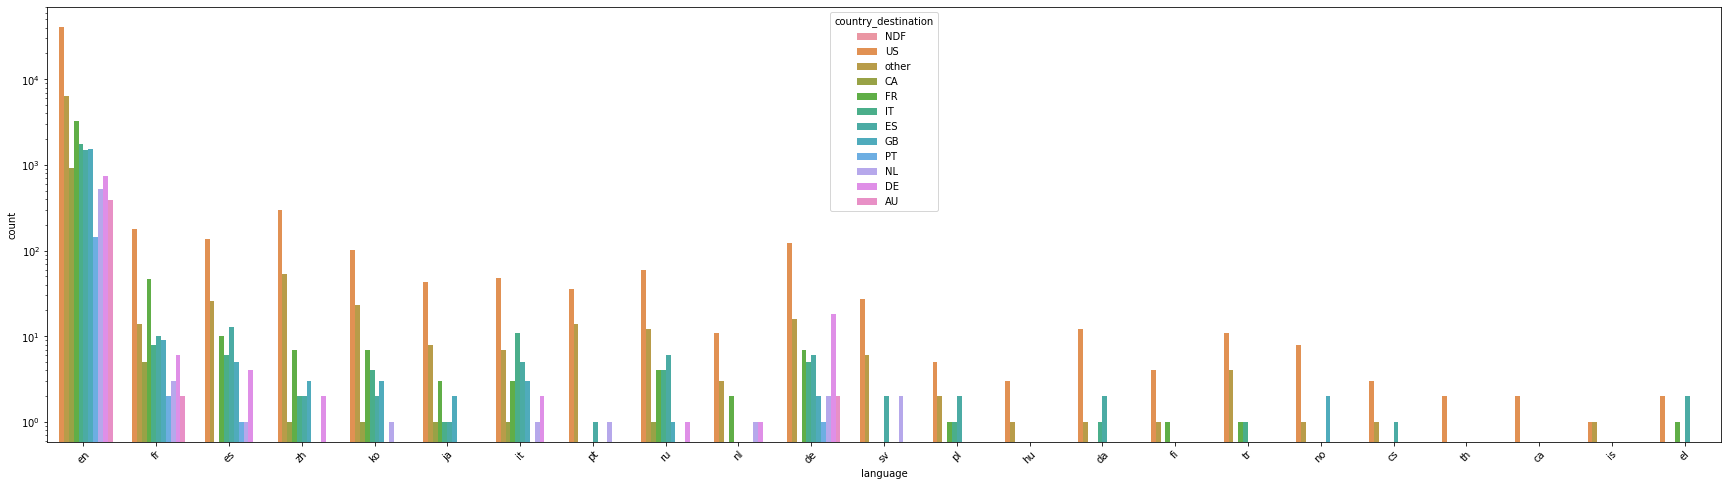

In [51]:
plt.figure(figsize=(30, 8))
sns.countplot(x=train_df[train_df['country_destination'] != 'NDF']['language'], hue='country_destination',
              data=train_df)
plt.xticks(rotation=45)
plt.yscale("log")

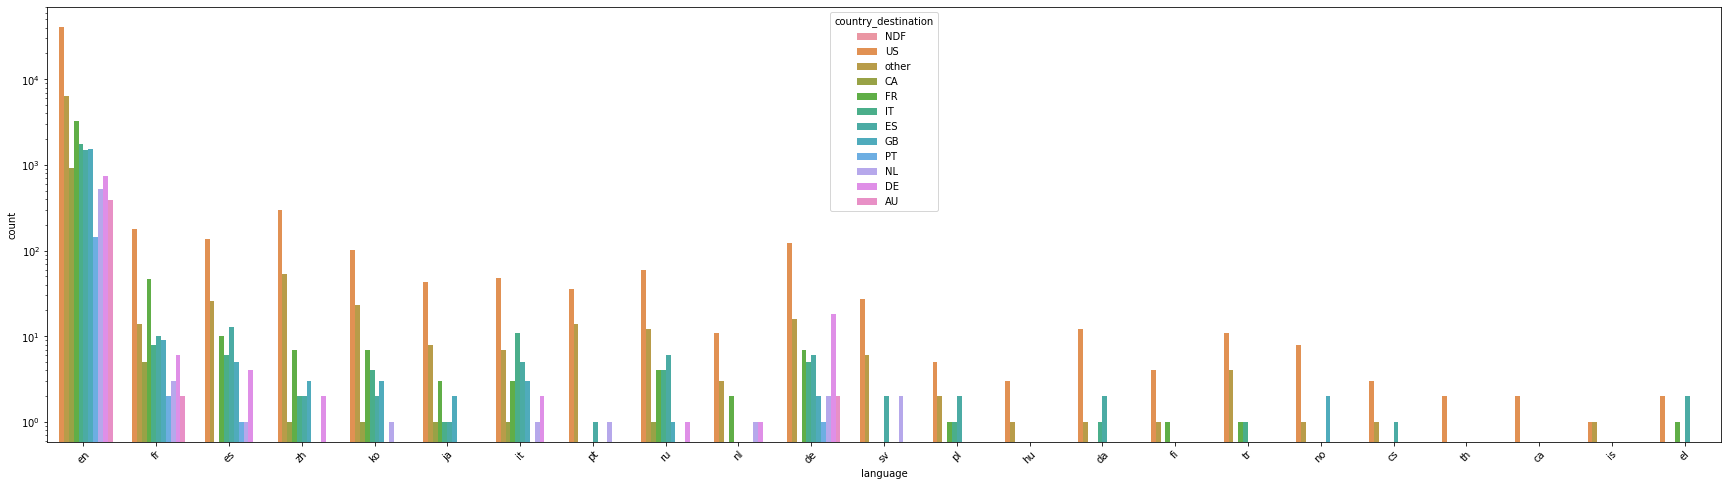

In [52]:
plt.figure(figsize=(30, 8))
sns.countplot(x=train_df[train_df['booked'] == True]['language'], hue='country_destination',
              data=train_df)
plt.xticks(rotation=45)
plt.yscale("log")

* 어느 나라든 영어를 사용함
* en은 어떤 언어든 자유롭게 사용

### [6] singup으로 확인

In [55]:
booked = train_df[train_df['booked']==True]

(array([0, 1, 2]),
 [Text(0, 0, 'basic'), Text(1, 0, 'facebook'), Text(2, 0, 'google')])

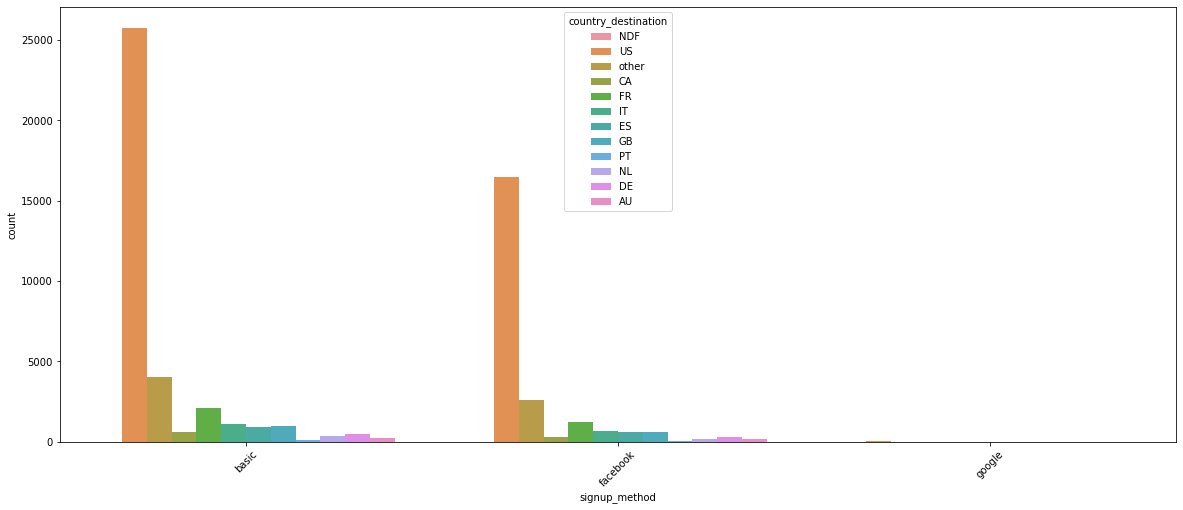

In [58]:
plt.figure(figsize=(20, 8))
sns.countplot(x=booked['signup_method'], hue='country_destination',
              data=train_df)
plt.xticks(rotation=45)

* 대부분 basic(AirBNB)로 가입을 했고, BASIC으로 가입한 사람들 중에서는 US가 많다.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Web'),
  Text(1, 0, 'Moweb'),
  Text(2, 0, 'iOS'),
  Text(3, 0, 'Android')])

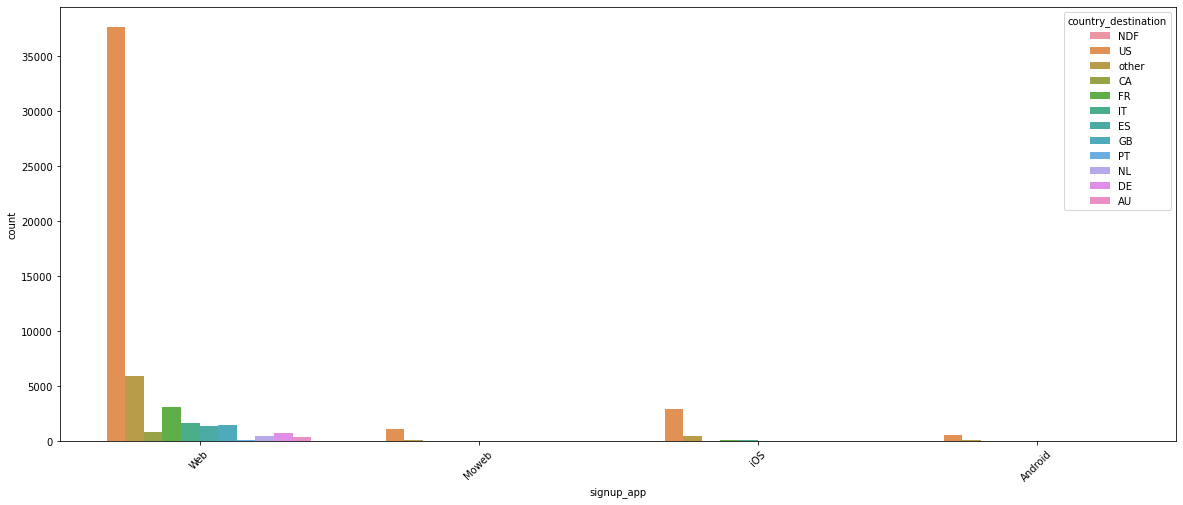

In [59]:
plt.figure(figsize=(20, 8))
sns.countplot(x=booked['signup_app'], hue='country_destination',
              data=train_df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'IE'),
  Text(1, 0, 'Firefox'),
  Text(2, 0, 'Safari'),
  Text(3, 0, 'Chrome'),
  Text(4, 0, '-unknown-'),
  Text(5, 0, 'RockMelt'),
  Text(6, 0, 'Chromium'),
  Text(7, 0, 'Android Browser'),
  Text(8, 0, 'Mobile Safari'),
  Text(9, 0, 'Chrome Mobile'),
  Text(10, 0, 'Palm Pre web browser'),
  Text(11, 0, 'AOL Explorer'),
  Text(12, 0, 'Opera'),
  Text(13, 0, 'Apple Mail'),
  Text(14, 0, 'Silk'),
  Text(15, 0, 'Camino'),
  Text(16, 0, 'BlackBerry Browser'),
  Text(17, 0, 'SeaMonkey'),
  Text(18, 0, 'Mobile Firefox'),
  Text(19, 0, 'IE Mobile'),
  Text(20, 0, 'Kindle Browser'),
  Text(21, 0, 'CoolNovo'),
  Text(22, 0, 'Maxthon'),
  Text(23, 0, 'wOSBrowser'),
  Text(24, 0, 'Sogou Explorer'),
  Text(25, 0, 'Mozilla'),
  Text(26, 0, 'Iron'),
  Text(27, 0, 'NetNewsWire'),
  Text(28, 0, 'CometBird'),
  T

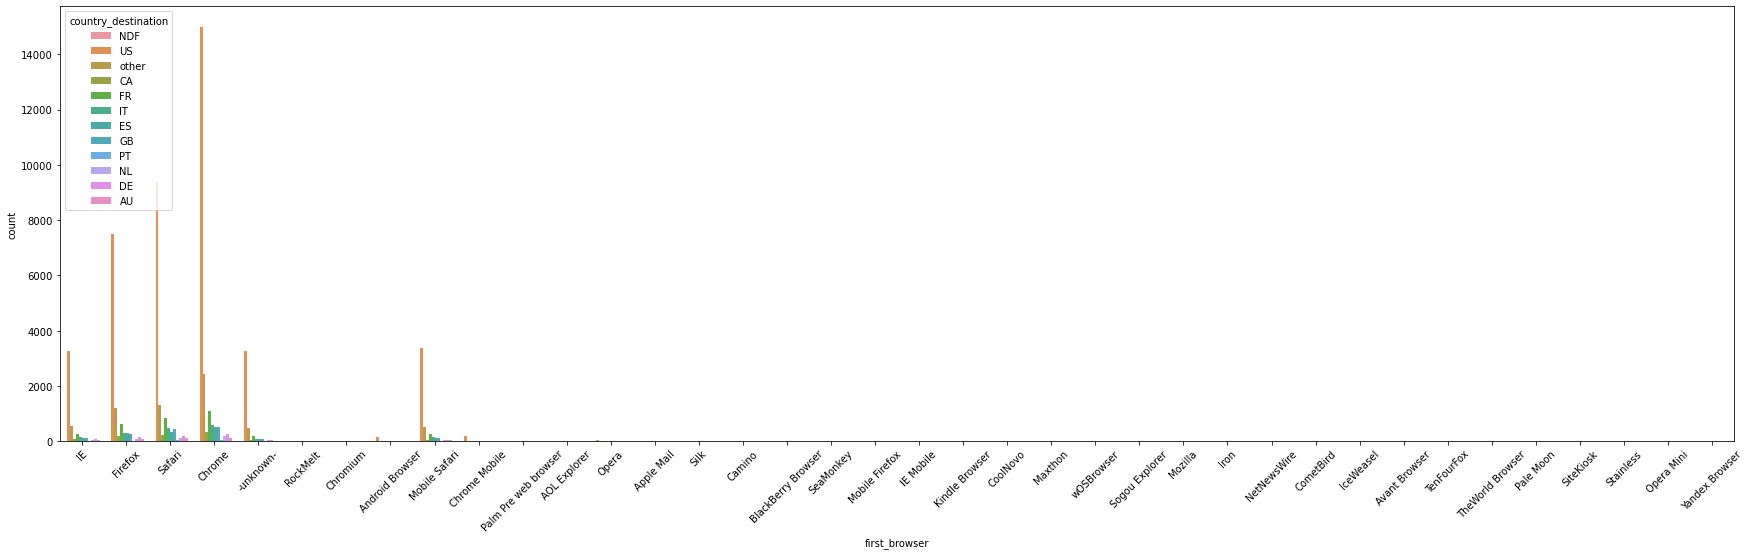

In [61]:
plt.figure(figsize=(30, 8))
sns.countplot(x=booked['first_browser'], hue='country_destination',
              data=train_df)
plt.xticks(rotation=45)

## 데이터 정리

#### 1. Country_destination
* NDF 처리 : Country_destination => date_first_booking에서 none 값을 찾아 그 부분을 nan으로 변경해 제거해서 사용한다.
* 

#### 2. Age
* null 값이 많다 -> null로 하는게 아니라, mean으로 취급하여 진행한다.
* 

#### 3. 